In [58]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format='{:,.2f}'.format

In [60]:
df=pd.read_excel("Viviendas_Madrid.xlsx",sheet_name="Datos_Históricos")
df.head(1)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.00,60.00,2,1.00,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,742.00","10,871.50","6,276.52",1.00,"5,436.25","10,871.50","16,306.75","21,742.00"
sq_mt_built,"21,616.00",146.92,134.18,13.00,70.00,100.00,162.00,999.00
sq_mt_useful,"8,228.00",103.46,88.26,1.00,59.00,79.00,113.00,998.00
n_rooms,"21,742.00",3.01,1.51,0.00,2.00,3.00,4.00,24.00
n_bathrooms,"21,726.00",2.09,1.41,1.00,1.00,2.00,2.00,16.00
n_floors,"1,437.00",3.13,0.91,1.00,2.00,3.00,4.00,7.00
sq_mt_allotment,"1,432.00",241.69,247.48,1.00,2.00,232.00,354.00,997.00
latitude,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portal,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Select the features who have rows with less than 20%  of null
null_less_20_perc=pd.DataFrame((df.isnull().sum()/df.shape[0])*100<20)
lista_less_20_perc=null_less_20_perc[null_less_20_perc[0]==True].index

In [64]:
len(lista_less_20_perc)

23

In [65]:
df1=df[lista_less_20_perc]
df1.head(1)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,...,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,has_lift,is_exterior,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.00,2,1.00,False,3,0.00,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,...,85000,1328,True,HouseType 1: Pisos,False,0.00,0.00,1.00,D,False


In [66]:
#Analyzing the remaining features
(df1.isnull().sum()/df1.shape[0])*100

id                         0.00
title                      0.00
subtitle                   0.00
sq_mt_built                0.58
n_rooms                    0.00
n_bathrooms                0.07
is_exact_address_hidden    0.00
floor                     11.99
is_floor_under             5.38
neighborhood_id            0.00
operation                  0.00
rent_price                 0.00
is_rent_price_known        0.00
buy_price                  0.00
buy_price_by_area          0.00
is_buy_price_known         0.00
house_type_id              1.80
is_renewal_needed          0.00
is_new_development         4.56
has_lift                  10.97
is_exterior               14.00
energy_certificate         0.00
has_parking                0.00
dtype: float64

In [67]:
#There are still features with null values, the features with more than 10% of null values will be analyzed one by one, the 
#remaining will have their null values dropped due to it´s a low percentage of the data
df1[["floor","has_lift","energy_certificate","is_exterior"]

,floor,has_lift,energy_certificate
0,3,0.00,D
1,4,1.00,en trÃ¡mite
2,1,1.00,no indicado
3,Bajo,1.00,en trÃ¡mite
4,4,1.00,en trÃ¡mite
...,...,...,...
21737,4,1.00,en trÃ¡mite
21738,3,1.00,en trÃ¡mite
21739,Bajo,0.00,E
21740,NaN,NaN,en trÃ¡mite


In [68]:
#Analyzing the "floor" feature
df1[["floor"]].head()

,floor
0,3
1,4
2,1
3,Bajo
4,4


In [69]:
df1[["floor"]].dtypes

floor    object
dtype: object

In [70]:
df1[["floor"]].nunique()

floor    19
dtype: int64

In [71]:
df1["floor"].unique()

array([3, 4, 1, 'Bajo', 2, nan, 7, 6, 'Semi-sÃ³tano', 5,
       'Entreplanta exterior', 8, 9, 'Entreplanta interior',
       'Entreplanta', 'Semi-sÃ³tano exterior', 'SÃ³tano interior',
       'Semi-sÃ³tano interior', 'SÃ³tano', 'SÃ³tano exterior'],
      dtype=object)

In [72]:
df1["floor"].value_counts()

1                        4440
2                        3546
3                        3001
4                        2323
Bajo                     2144
5                        1310
6                         913
7                         556
8                         326
Entreplanta exterior      236
9                         181
Semi-sÃ³tano exterior      55
Semi-sÃ³tano interior      36
Entreplanta interior       32
SÃ³tano interior           23
SÃ³tano                     5
SÃ³tano exterior            4
Entreplanta                 3
Semi-sÃ³tano                1
Name: floor, dtype: int64

In [73]:
#Fixing the grammatical problems of the floor column

df1.loc[(df1["floor"]=="Semi-sÃ³tano exterior"),"floor"]="Semi-Sotano exterior"
df1.loc[(df1["floor"]=="Semi-sÃ³tano interior"),"floor"]="Semi-Sotano interior"
df1.loc[(df1["floor"]=="SÃ³tano interior"),"floor"]="Sotano interior"
df1.loc[(df1["floor"]=="SÃ³tano"),"floor"]="Sotano"
df1.loc[(df1["floor"]=="SÃ³tano exterior"),"floor"]="Sotano exterior"
df1.loc[(df1["floor"]=="Semi-sÃ³tano"),"floor"]="Semi-Sotano"

In [74]:
df1["floor"].value_counts()

1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-Sotano exterior      55
Semi-Sotano interior      36
Entreplanta interior      32
Sotano interior           23
Sotano                     5
Sotano exterior            4
Entreplanta                3
Semi-Sotano                1
Name: floor, dtype: int64

In [75]:
df1["floor"].mode()[0]

1

In [76]:
#Filling the null values with the mode
df1["floor"]=df1["floor"].fillna(df1["floor"].mode()[0])

In [77]:
#Analyzing the "has lift" feature
df1[["has_lift"]].head()

,has_lift
0,0.00
1,1.00
2,1.00
3,1.00
4,1.00


In [78]:
df1[["has_lift"]].dtypes

has_lift    float64
dtype: object

In [79]:
df1["has_lift"].nunique()

2

In [80]:
df1["has_lift"].unique()

array([ 0.,  1., nan])

In [81]:
#Filling the null values with the mean
df1["has_lift"]=df1["has_lift"].fillna(df1["has_lift"].mean())

In [82]:
#Analyzing the energy_certificate columns
df1["energy_certificate"].head()

0              D
1    en trÃ¡mite
2    no indicado
3    en trÃ¡mite
4    en trÃ¡mite
Name: energy_certificate, dtype: object

In [83]:
df1["energy_certificate"].nunique()

10

In [84]:
df1["energy_certificate"].unique()

array(['D', 'en trÃ¡mite', 'no indicado', 'F', 'E', 'inmueble exento',
       'B', 'A', 'G', 'C'], dtype=object)

In [85]:
#Fixing the grammatical problems of the energy_certificate column

df1.loc[(df1["energy_certificate"]=="en trÃ¡mite"),"energy_certificate"]="En Trámite"

In [86]:
df1["energy_certificate"].head()

0              D
1     En Trámite
2    no indicado
3     En Trámite
4     En Trámite
Name: energy_certificate, dtype: object

In [88]:
#Analyzing the is_exterior column

df1["is_exterior"].head()

0   1.00
1   1.00
2   1.00
3   1.00
4   1.00
Name: is_exterior, dtype: float64

In [90]:
df1["is_exterior"].nunique()

2

In [91]:
df1["is_exterior"].unique()

array([ 1., nan,  0.])

In [92]:
#Filling the null values with the mean
df1["is_exterior"]=df1["is_exterior"].fillna(df1["is_exterior"].mean())

In [93]:
#Analyzing the remaining features with null values
(df1.isnull().sum()/df1.shape[0])*100

id                        0.00
title                     0.00
subtitle                  0.00
sq_mt_built               0.58
n_rooms                   0.00
n_bathrooms               0.07
is_exact_address_hidden   0.00
floor                     0.00
is_floor_under            5.38
neighborhood_id           0.00
operation                 0.00
rent_price                0.00
is_rent_price_known       0.00
buy_price                 0.00
buy_price_by_area         0.00
is_buy_price_known        0.00
house_type_id             1.80
is_renewal_needed         0.00
is_new_development        4.56
has_lift                  0.00
is_exterior               0.00
energy_certificate        0.00
has_parking               0.00
dtype: float64

In [94]:
#The remaining null values will be dropped directly since the percentage of them is very low

df1=df1.dropna()

(df1.isnull().sum()/df1.shape[0])*100


id                        0.00
title                     0.00
subtitle                  0.00
sq_mt_built               0.00
n_rooms                   0.00
n_bathrooms               0.00
is_exact_address_hidden   0.00
floor                     0.00
is_floor_under            0.00
neighborhood_id           0.00
operation                 0.00
rent_price                0.00
is_rent_price_known       0.00
buy_price                 0.00
buy_price_by_area         0.00
is_buy_price_known        0.00
house_type_id             0.00
is_renewal_needed         0.00
is_new_development        0.00
has_lift                  0.00
is_exterior               0.00
energy_certificate        0.00
has_parking               0.00
dtype: float64

In [99]:
#ANALYZING THE DIFFERENT TYPE OF FEATURES IN THE DATASET
categorical=df1.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df1[line].unique())) ," distinct values ")

The feature title contains 9813  distinct values 
The feature subtitle contains 146  distinct values 
The feature floor contains 18  distinct values 
The feature neighborhood_id contains 126  distinct values 
The feature operation contains 1  distinct values 
The feature house_type_id contains 4  distinct values 
The feature energy_certificate contains 10  distinct values 


In [100]:
#Due to the big amount of unique values that they have, the features :title,subtitle and neighborhood_id. This will allow
#that the machine learning or neural network could work with less problems

df1=df1.drop(columns=["title","subtitle","neighborhood_id"])

In [101]:
#Redefining the new categorical values
categorical=df1.select_dtypes(include="object").columns

In [102]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df1[categorical])

#Joining the new features with the first dataframe
df1=pd.concat([df1,new_features],axis=1)

#Dropping the categorical columns due to they were transformed in new columns
df1=df1.drop(columns=categorical)
df1.head()

,id,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,rent_price,is_rent_price_known,buy_price,buy_price_by_area,...,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_En Trámite,energy_certificate_F,energy_certificate_G,energy_certificate_inmueble exento,energy_certificate_no indicado
0,21742,64.00,2,1.00,False,0.00,471.00,False,85000,1328,...,0,0,0,1,0,0,0,0,0,0
1,21741,70.00,3,1.00,True,0.00,666.00,False,129900,1856,...,0,0,0,0,0,1,0,0,0,0
2,21740,94.00,2,2.00,False,0.00,722.00,False,144247,1535,...,0,0,0,0,0,0,0,0,0,1
3,21739,64.00,2,1.00,True,1.00,583.00,False,109900,1717,...,0,0,0,0,0,1,0,0,0,0
4,21738,108.00,2,2.00,True,0.00,"1,094.00",False,260000,2407,...,0,0,0,0,0,1,0,0,0,0


In [103]:
#Since the column id does not add value to the DataFrame it will be dropped
df1=df1.drop(columns=["id"])
df1.head(1)

,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,...,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_En Trámite,energy_certificate_F,energy_certificate_G,energy_certificate_inmueble exento,energy_certificate_no indicado
0,64.00,2,1.00,False,0.00,471.00,False,85000,1328,True,...,0,0,0,1,0,0,0,0,0,0


In [113]:
#Analyzing the correlation between tha different features
df1.corr()["buy_price"].abs().sort_values(ascending=False)[1:len(df1.columns)-3]

rent_price                                 0.92
sq_mt_built                                0.83
n_bathrooms                                0.75
buy_price_by_area                          0.58
n_rooms                                    0.58
house_type_id_HouseType 2: Casa o chalet   0.38
house_type_id_HouseType 1: Pisos           0.33
has_parking                                0.32
has_lift                                   0.26
is_exact_address_hidden                    0.17
is_floor_under                             0.15
floor_1                                    0.14
floor_Bajo                                 0.14
is_exterior                                0.09
energy_certificate_G                       0.07
house_type_id_HouseType 5: Ãticos         0.06
energy_certificate_C                       0.05
is_renewal_needed                          0.05
floor_3                                    0.05
house_type_id_HouseType 4: DÃºplex         0.05
energy_certificate_A                    

In [117]:
#Defining X and y
X=df1.drop(columns=["buy_price"])
y=df1[["buy_price"]]

In [118]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [119]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)


In [120]:
#Importing the libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [121]:
#Preparing the models
models={
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elastic Net":ElasticNet(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Bagging Regressor":BaggingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor":ExtraTreesRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}

#Evaluating the models in turn
results=[]
names=[]
scoring="neg_mean_squared_error"
y_t=y_train.values.reshape(-1,1)
for name, model in models.items():
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_t.ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean():,.2f} ({cv_results.std():.2f})")

Lasso :-1.00 (0.09)
Ridge :-0.08 (0.01)
Elastic Net :-0.50 (0.08)
KNN :-0.12 (0.01)
Decision Tree :-0.00 (0.00)
Bagging Regressor :-0.00 (0.00)
Random Forest Regressor :-0.00 (0.00)
Extra Trees Regressor :-0.00 (0.00)
AdaBoostRegressor :-0.08 (0.01)
GradientBoostingRegressor :-0.00 (0.00)


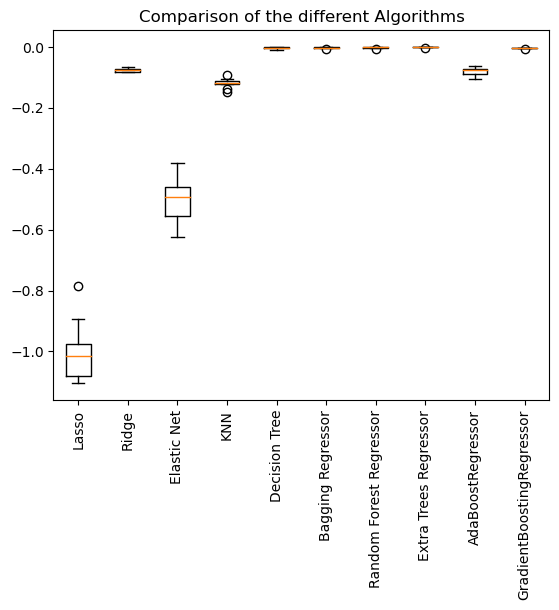

In [122]:
#Comparing the models

import matplotlib.pyplot as plt

import numpy as np

plt.title("Comparison of the different Algorithms")

plt.boxplot(results)

plt.xticks(np.arange(1,len(names)+1),names,rotation="vertical")

plt.show()

In [123]:
#Fine Tuning the best model

import numpy as np

n_estimators=np.arange(10,20)

parameters=dict(n_estimators=n_estimators)

model=GradientBoostingRegressor()

kfold=KFold(n_splits=10,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

y_t=y_train.values.reshape(-1,1)

grid_result.fit(X_train,y_t.ravel())

#Summarize_results
print("Best : %f using the params : %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]

for mean,stdev,param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.955746 using the params : {'n_estimators': 19}
0.830642 (0.005637) with {'n_estimators': 10}
0.855850 (0.004769) with {'n_estimators': 11}
0.876353 (0.004874) with {'n_estimators': 12}
0.895103 (0.004868) with {'n_estimators': 13}
0.910216 (0.004413) with {'n_estimators': 14}
0.922483 (0.004208) with {'n_estimators': 15}
0.933058 (0.003947) with {'n_estimators': 16}
0.941955 (0.003736) with {'n_estimators': 17}
0.949577 (0.003850) with {'n_estimators': 18}
0.955746 (0.003608) with {'n_estimators': 19}


In [124]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))
dump(scaler_y,open("scaler_y.pkl","wb"))

In [125]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_sklearn_madrid.pkl","wb"))

In [140]:
#Evaluating the model using different scalers

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(grid_result.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , MSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 96728.768442 , MSE : 149914.721979 , R2 : 0.957185


In [127]:
y.mean()[0].round(2)

632592.35

In [128]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )
    

Real = 198000 , Prediction = 294400 
Real = 380000 , Prediction = 412226 
Real = 479000 , Prediction = 498818 
Real = 165000 , Prediction = 250321 
Real = 1520000 , Prediction = 1203320 
Real = 116000 , Prediction = 237142 
Real = 730000 , Prediction = 764784 
Real = 1150000 , Prediction = 1120933 
Real = 610000 , Prediction = 670463 
Real = 334312 , Prediction = 411379 
Real = 300000 , Prediction = 334572 
Real = 2980000 , Prediction = 2619803 
Real = 160000 , Prediction = 237142 
Real = 660000 , Prediction = 695030 
Real = 995000 , Prediction = 923728 
Real = 100000 , Prediction = 237142 
Real = 860000 , Prediction = 856291 
Real = 1050000 , Prediction = 857161 
Real = 990000 , Prediction = 1078934 
Real = 109000 , Prediction = 237142 


In [129]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X.columns,range(X.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [130]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [131]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [132]:
early=EarlyStopping(monitor="val_loss", patience=20)

In [133]:
#Creating the model
model=Sequential()
model.add(Dense(256,input_dim=X.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

#Compiling the model
model.compile(optimizer="adam", loss="mse")

#Fitting the model
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_split=0.25, callbacks=[early])

Epoch 1/200
317/317 [==============================] - 2s 3ms/step - loss: 0.0805 - val_loss: 0.0199
Epoch 2/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0855 - val_loss: 0.0259
Epoch 3/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 4/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 5/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 7/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 8/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 9/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 10/200
317/317 [==============================] - 1s 2ms/step - loss: 0.0023 - val_lo

In [134]:
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

model.evaluate(X_test_scaled,y_test_scaled)

182/182 [==============================] - 0s 1ms/step - loss: 9.7299e-04


0.0009729936136864126

In [139]:
#Evaluating the neural network

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , MSE : %f , R2 : %f" % (mae,rmse,r2))

182/182 [==============================] - 0s 1ms/step
MAE : 10537.595355 , MSE : 22406.111200 , R2 : 0.999044


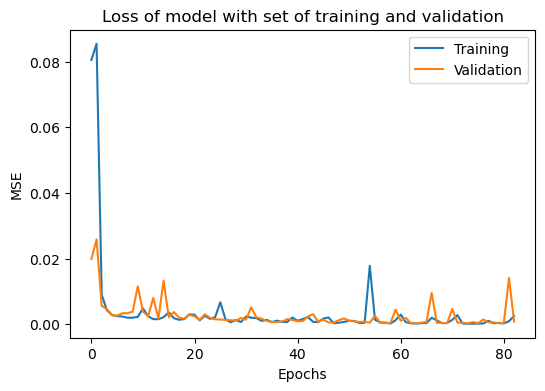

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"])
plt.title("Loss of model with set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("MSE");
plt.legend(["Training","Validation"],loc="upper right");

In [137]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 198000 , Prediction = 201613 
Real = 380000 , Prediction = 378624 
Real = 479000 , Prediction = 495322 
Real = 165000 , Prediction = 169929 
Real = 1520000 , Prediction = 1376677 
Real = 116000 , Prediction = 112948 
Real = 730000 , Prediction = 741612 
Real = 1150000 , Prediction = 1128472 
Real = 610000 , Prediction = 616583 
Real = 334312 , Prediction = 342039 
Real = 300000 , Prediction = 309655 
Real = 2980000 , Prediction = 3001840 
Real = 160000 , Prediction = 166588 
Real = 660000 , Prediction = 658562 
Real = 995000 , Prediction = 981121 
Real = 100000 , Prediction = 121929 
Real = 860000 , Prediction = 870076 
Real = 1050000 , Prediction = 990111 
Real = 990000 , Prediction = 971132 
Real = 109000 , Prediction = 107698 
